# Preliminares

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MBA/Introdução à aprendizagem de máquina/trabalho/dataset/nba_stats.csv',
                   sep=",")
data.head()

,year,name,playerId,playerSlug,positionId,teamId,status,gamesPlayed,avgMinutes,avgFouls,...,position,birthdate,college,draftinfo,birthplace,team,htwt,experience,rankingSalary,salary
0,1999,Allen Iverson,366,allen-iverson,SG,PHI,inactive,48.0,41.458332,2.041667,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,15,"$9,000,000"
1,2000,Allen Iverson,366,allen-iverson,SG,PHI,inactive,70.0,40.757140,2.314286,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,27,"$10,125,000"
2,2001,Allen Iverson,366,allen-iverson,SG,PHI,inactive,71.0,41.957745,2.070423,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,17,"$11,250,000"
3,2002,Allen Iverson,366,allen-iverson,SG,PHI,inactive,60.0,43.700000,1.700000,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,14,"$12,375,000"
4,2003,Allen Iverson,366,allen-iverson,SG,PHI,inactive,82.0,42.500000,1.817073,...,Shooting Guard,6/7/1975,Georgetown,"1996: Rd 1, Pk 1 (PHI)","Hampton, VA",NaN,NaN,NaN,11,"$13,500,000"


## Qual objetivo?
Objetivo é determinar quando um jogador é superfaturado, isto é. ganha mais do que devia dado seu desempenho em quadra.
Para tal usaremos o erro médio de residuos(MER), pois ao aplicarmos a regressão linear, estamos interessados em estimar caso estejam subestimados ou superestimados.



# Análise inicial Básica

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

In [5]:
data.describe()

,year,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,rankingSalary
count,8162.000000,8.162000e+03,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,...,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
mean,2012.214776,8.666390e+05,57.978804,22.519525,1.962077,0.297599,2.159642,0.145430,5.431144,0.172507,...,129.835212,110.210365,144.387405,133.548395,81.996815,0.706763,0.463943,44.879441,29.252022,210.610512
std,6.701035,1.517331e+06,21.756214,9.478818,0.750375,0.653207,3.217839,0.446963,10.202230,1.263530,...,142.367073,109.945917,137.447434,139.569406,63.099111,0.437720,0.486103,34.028145,34.792868,140.763132
min,1999.000000,2.000000e+00,1.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2007.000000,9.290000e+02,46.000000,15.097222,1.446808,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,31.000000,44.250000,35.000000,33.000000,0.383562,0.147059,18.000000,7.000000,90.000000
50%,2013.000000,3.045500e+03,64.000000,22.769346,1.972222,0.000000,1.000000,0.000000,1.000000,0.000000,...,82.000000,77.000000,104.000000,88.000000,69.000000,0.634146,0.307692,39.000000,18.000000,192.000000
75%,2018.000000,2.451037e+06,76.000000,30.448024,2.486486,0.000000,3.000000,0.000000,6.000000,0.000000,...,218.000000,154.000000,203.000000,185.000000,118.000000,0.946429,0.597170,64.000000,38.000000,321.000000
max,2023.000000,4.997528e+06,85.000000,43.700000,6.000000,9.000000,41.000000,7.000000,69.000000,42.000000,...,1028.000000,756.000000,916.000000,925.000000,464.000000,2.885246,3.913044,225.000000,307.000000,676.000000




---


De início, vamos iniciar desconsiderando colunas que não tenham relação com o desempenho. Para também não ser injusto, será agrupado durante toda a carreira de determinado atleta.



---



In [6]:
data.columns

Index(['year', 'name', 'playerId', 'playerSlug', 'positionId', 'teamId',
       'status', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'position', 'birthdate', 'college', 'draftinfo',
       'birthplace', 'team', 'htwt', 'experience', 'rankingSalary', 'salary'],
      dtype='object')

In [7]:
data_safe_copy = data

data.drop(columns=['birthdate','team','college','draftinfo',
                   'birthplace','year','position','status',
                   'teamId','playerSlug','name','year',
                   'positionId','htwt','experience','rankingSalary'],
                   inplace=True)

In [8]:
data.columns

Index(['playerId', 'gamesPlayed', 'avgMinutes', 'avgFouls', 'flagrantFouls',
       'technicalFouls', 'ejections', 'doubleDouble', 'tripleDouble',
       'minutes', 'rebounds', 'fouls', 'avgRebounds', 'avgPoints',
       'avgFieldGoalsMade', 'avgFieldGoalsAttempted', 'fieldGoalPct',
       'avgThreePointFieldGoalsMade', 'avgThreePointFieldGoalsAttempted',
       'threePointFieldGoalPct', 'avgFreeThrowsMade', 'avgFreeThrowsAttempted',
       'freeThrowPct', 'avgAssists', 'avgTurnovers', 'points',
       'fieldGoalsMade', 'fieldGoalsAttempted', 'threePointFieldGoalsMade',
       'threePointFieldGoalsAttempted', 'freeThrowsMade',
       'freeThrowsAttempted', 'assists', 'turnovers', 'avgSteals', 'avgBlocks',
       'steals', 'blocks', 'salary'],
      dtype='object')



---


Precisamos tratar os dados de salario para que possam ser convertidos para float



---



In [9]:
import re
def removerNaoNumerico(salario):
    return float(re.sub(r'[^0-9]', '', salario))

In [10]:
data['salary'] = data['salary'].apply(removerNaoNumerico)
data['playerId'] = data['playerId'].apply(str)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   playerId                          8162 non-null   object 
 1   gamesPlayed                       8162 non-null   float64
 2   avgMinutes                        8162 non-null   float64
 3   avgFouls                          8162 non-null   float64
 4   flagrantFouls                     8162 non-null   float64
 5   technicalFouls                    8162 non-null   float64
 6   ejections                         8162 non-null   float64
 7   doubleDouble                      8162 non-null   float64
 8   tripleDouble                      8162 non-null   float64
 9   minutes                           8162 non-null   float64
 10  rebounds                          8162 non-null   float64
 11  fouls                             8162 non-null   float64
 12  avgReb

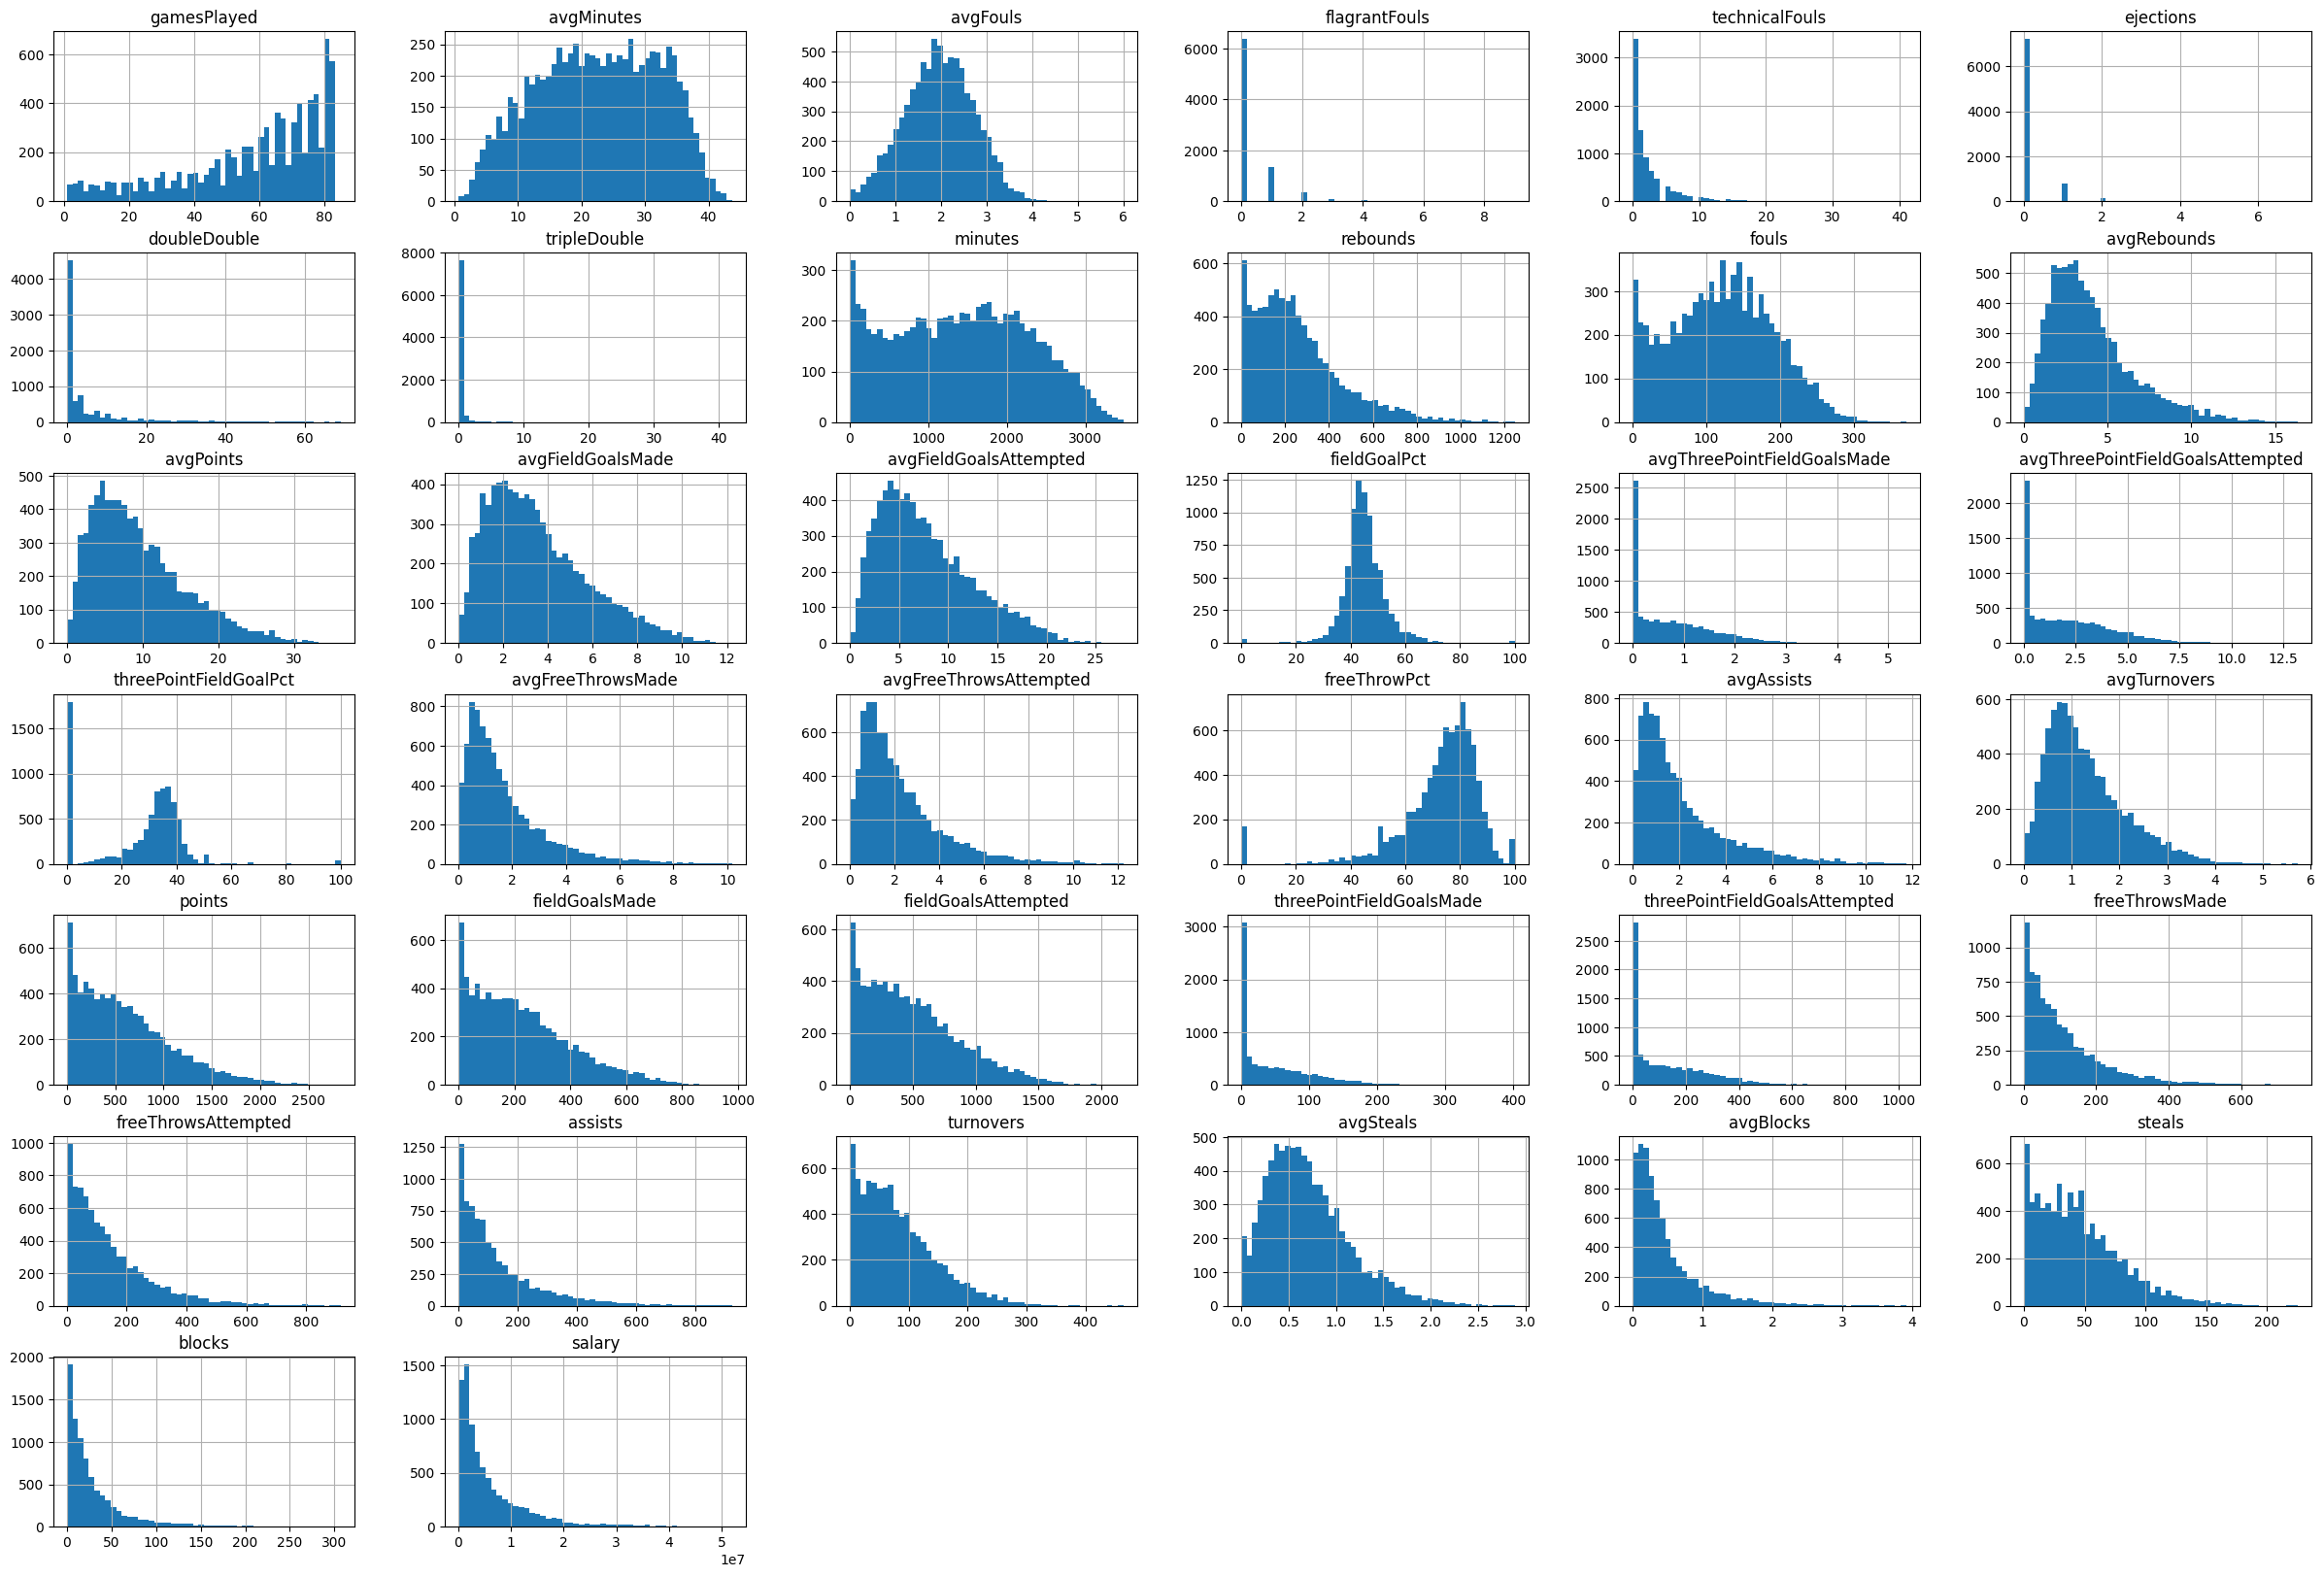

In [12]:
data.hist(bins=50,figsize = (30, 20))

plt.show()

# Agrupando por jogador



---

Como ele pode ter recebido salário superfaturado em uma parte da carreira, agruparemos pelo Id do jogador,dado que existe um jogador com mesmo nome que outro, e tiraremos a **média** de desempenho e salário.

---



In [13]:
df = data.groupby('playerId',as_index=False).mean().copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   playerId                          1648 non-null   object 
 1   gamesPlayed                       1648 non-null   float64
 2   avgMinutes                        1648 non-null   float64
 3   avgFouls                          1648 non-null   float64
 4   flagrantFouls                     1648 non-null   float64
 5   technicalFouls                    1648 non-null   float64
 6   ejections                         1648 non-null   float64
 7   doubleDouble                      1648 non-null   float64
 8   tripleDouble                      1648 non-null   float64
 9   minutes                           1648 non-null   float64
 10  rebounds                          1648 non-null   float64
 11  fouls                             1648 non-null   float64
 12  avgReb

In [15]:
df

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,salary
0,10,48.714286,11.955939,1.635716,0.285714,0.571429,0.000000,0.000000,0.000000,595.285714,...,1.571429,17.571429,23.000000,21.857143,23.285714,0.209567,0.309127,11.142857,15.142857,1.221855e+06
1,1000,60.222222,22.706016,2.382355,0.444444,1.777778,0.111111,6.666667,0.000000,1428.222222,...,0.333333,98.222222,167.888889,35.777778,67.777778,0.394807,1.403981,23.444444,82.777778,5.788556e+06
2,1002,58.500000,15.505503,1.618147,0.000000,1.750000,0.000000,1.000000,0.000000,1020.750000,...,0.250000,58.000000,118.000000,14.000000,45.000000,0.103065,0.961265,7.250000,65.000000,3.342507e+06
3,1006,72.562500,29.417164,2.260165,0.375000,2.562500,0.062500,3.750000,0.062500,2133.125000,...,172.625000,222.375000,289.500000,149.812500,110.187500,0.674424,0.298735,49.062500,21.625000,6.940205e+06
4,1007,76.312500,35.313680,1.779639,0.250000,0.875000,0.062500,3.125000,0.125000,2689.312500,...,324.125000,171.437500,213.937500,307.375000,150.125000,0.860978,0.205507,65.812500,15.812500,1.149237e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,994,8.000000,4.875000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,...,3.000000,4.000000,4.000000,6.000000,3.000000,0.250000,0.000000,2.000000,0.000000,1.009000e+06
1644,996,70.352941,33.870384,2.167903,0.235294,2.235294,0.000000,31.235294,0.588235,2390.647059,...,27.823529,278.058824,368.882353,227.882353,154.235294,0.503333,1.602343,35.352941,113.294118,1.182929e+07
1645,997,71.000000,22.233725,1.700913,0.000000,0.000000,0.000000,6.333333,0.000000,1582.333333,...,186.333333,54.666667,79.333333,48.666667,48.333333,0.249054,1.878539,17.666667,133.333333,2.454000e+06
1646,998,73.000000,24.726821,2.124284,0.000000,0.571429,0.000000,0.285714,0.000000,1844.000000,...,40.142857,64.000000,83.714286,135.571429,72.000000,0.438608,0.391728,32.714286,29.857143,3.264143e+06


In [16]:
df.describe()

,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,ejections,doubleDouble,tripleDouble,minutes,rebounds,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,salary
count,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,...,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1648.000000,1.648000e+03
mean,49.776248,18.549075,1.711490,0.238013,1.503404,0.105143,3.263390,0.095736,1078.449616,188.619710,...,99.146263,76.077075,100.752034,95.947894,60.402855,0.575093,0.370976,33.496869,21.371784,4.168178e+06
std,20.218355,8.454239,0.697972,0.392165,2.268493,0.249459,6.487697,0.677494,710.037670,153.348414,...,109.935225,77.687802,98.044945,106.405250,49.031395,0.359881,0.377194,26.595852,25.224095,4.414178e+06
min,1.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.558000e+03
25%,37.937500,12.003647,1.215876,0.000000,0.000000,0.000000,0.000000,0.000000,479.562500,74.000000,...,5.000000,20.333333,29.312500,23.150000,23.000000,0.308873,0.126292,12.093750,5.208333,1.312611e+06
50%,55.472222,18.245408,1.725883,0.000000,0.666667,0.000000,0.600000,0.000000,1041.333333,158.000000,...,57.152778,54.333333,73.111111,59.291667,49.657143,0.514114,0.258343,28.000000,13.000000,2.515439e+06
75%,65.388393,24.694013,2.214527,0.333333,2.000000,0.111111,3.187500,0.000000,1618.831731,265.531250,...,169.732143,105.160714,139.500000,127.386364,85.666667,0.769674,0.479843,49.114583,26.471154,5.409704e+06
max,82.000000,40.844635,4.000000,3.000000,22.181818,4.000000,47.000000,13.857143,3176.666667,905.727273,...,646.583333,525.500000,633.500000,696.666667,299.142857,2.141606,2.832067,147.500000,173.333333,3.140858e+07


In [17]:
corr_matrix = df.iloc[:,1:].corr()

corr_matrix.sort_values(by='salary',inplace=True,ascending=False)

corr_matrix['salary']

salary                              1.000000
avgPoints                           0.804153
avgFieldGoalsMade                   0.797468
points                              0.793971
fieldGoalsMade                      0.787280
avgFieldGoalsAttempted              0.758752
freeThrowsMade                      0.756538
fieldGoalsAttempted                 0.755499
freeThrowsAttempted                 0.752382
avgFreeThrowsMade                   0.744860
avgFreeThrowsAttempted              0.737145
turnovers                           0.717533
avgMinutes                          0.705477
avgTurnovers                        0.691440
minutes                             0.679053
rebounds                            0.645346
doubleDouble                        0.639796
avgRebounds                         0.622602
steals                              0.595563
assists                             0.585568
avgAssists                          0.564044
avgSteals                           0.552164
fouls     

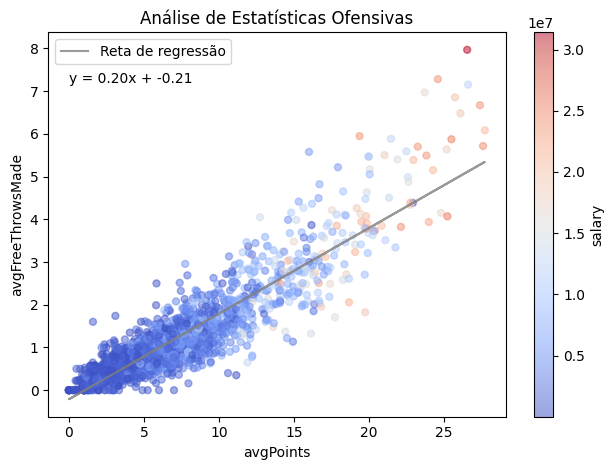

In [18]:
cm = plt.get_cmap('coolwarm')

a,b = np.polyfit(df['avgPoints'],df['avgFreeThrowsMade'],1)
reta = a * df['avgPoints']  + b

df.plot(kind='scatter',
        x='avgPoints',
        y='avgFreeThrowsMade',
        s=25,
        alpha=0.5,
        c='salary',
        cmap=cm,)

plt.plot(df['avgPoints'], reta, color='gray', label='Reta de regressão',alpha=0.8)

plt.title('Análise de Estatísticas Ofensivas')

eq = f'y = {a:.2f}x + {b:.2f}'  # Equação da reta

plt.text(0, 7.2, eq, fontsize=10, color='black')  # Exibir a equação no gráfico


plt.tight_layout()

plt.legend()

plt.show()

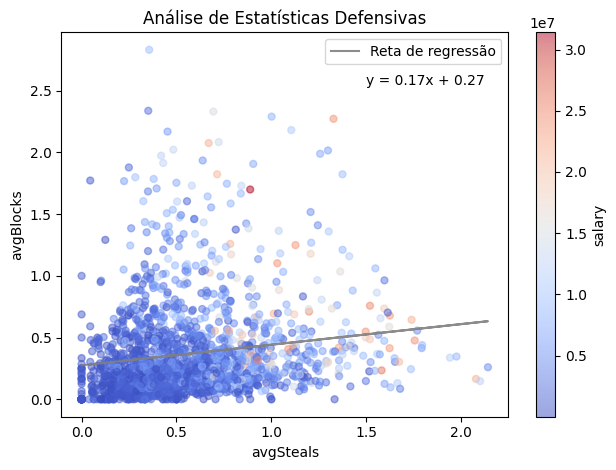

In [19]:
cm = plt.get_cmap('coolwarm')

a,b = np.polyfit(df['avgSteals'],df['avgBlocks'],1)
reta = a * df['avgSteals']  + b

df.plot(kind='scatter',
        x='avgSteals',
        y='avgBlocks',
        s=25,
        alpha=0.5,
        c='salary',
        cmap=cm,)

plt.plot(df['avgSteals'], reta, color='gray', label='Reta de regressão',alpha=0.9)

plt.title('Análise de Estatísticas Defensivas')

eq = f'y = {a:.2f}x + {b:.2f}'  # Equação da reta
plt.text(1.5, 2.55, eq, fontsize=10, color='black')  # Exibir a equação no gráfico


plt.tight_layout()

plt.legend()

plt.show()



---

Como ejection é um dado negativo e apresenta correlação positiva, vamos excluir do dataframe para evitar alguma análise errada.

---





In [20]:
data.drop(columns='ejections',
          inplace=True)

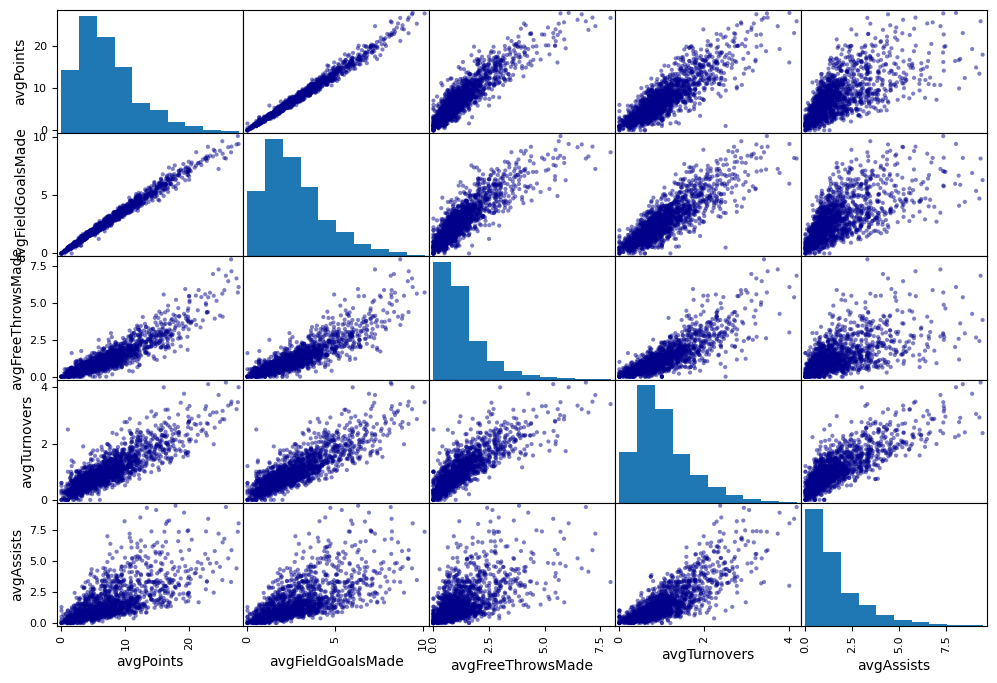

In [21]:
atributos = ['avgPoints','avgFieldGoalsMade','avgFreeThrowsMade','avgTurnovers','avgAssists']

scatter_matrix(df[atributos],figsize=(12,8),
               c='darkblue')

plt.show()

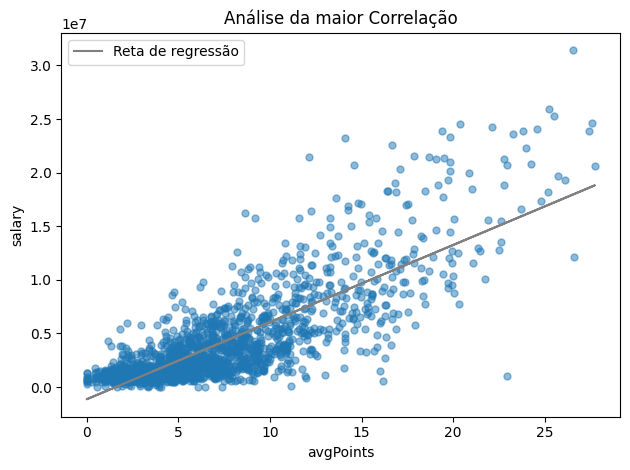

In [22]:
a,b = np.polyfit(df['avgPoints'],df['salary'],1)

reta = a * df['avgPoints']  + b

df.plot(kind='scatter',
        x='avgPoints',
        y='salary',
        s=25,
        alpha=0.5)

plt.plot(df['avgPoints'], reta, color='gray', label='Reta de regressão')

plt.title('Análise da maior Correlação')

plt.tight_layout()

plt.legend()

plt.show()

# Preparando os dados

## Checando se há valores faltantes

In [23]:
df.isna().sum()

playerId                            0
gamesPlayed                         0
avgMinutes                          0
avgFouls                            0
flagrantFouls                       0
technicalFouls                      0
ejections                           0
doubleDouble                        0
tripleDouble                        0
minutes                             0
rebounds                            0
fouls                               0
avgRebounds                         0
avgPoints                           0
avgFieldGoalsMade                   0
avgFieldGoalsAttempted              0
fieldGoalPct                        0
avgThreePointFieldGoalsMade         0
avgThreePointFieldGoalsAttempted    0
threePointFieldGoalPct              0
avgFreeThrowsMade                   0
avgFreeThrowsAttempted              0
freeThrowPct                        0
avgAssists                          0
avgTurnovers                        0
points                              0
fieldGoalsMa



---


Vemos que não há a necessidade de usar um imputer, dado que os dados selecionados não possuem valores faltantes.



---



### Para um futuro pipeline

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

class DataPreprocessor:
    def __init__(self):
        pass

    def padronizador(self, df):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df)
        scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

        return scaled_df

    def amostrador(self, X, y, execute = False):
        if execute:
            oversampler = RandomOverSampler()
            X_resampled, y_resampled = oversampler.fit_resample(X, y)
            return X_resampled, y_resampled
        else:
            return X,y

    def imputador(self, df, strategy='mean',execute = False):
        if execute:
            imputer = SimpleImputer(strategy=strategy)
            imputed_data = imputer.fit_transform(df)
            imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
            return imputed_df
        else:
            return df

## Scaler

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def standard_scaler(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df

def minmax_scaler(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df

### Ajustando os conjuntos de Treino

## Treino e teste para o modelo

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data = data.sample(frac=1.0)

In [28]:
data_std = data.copy()
data_std = standard_scaler(data_std)
data_std.head()

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,doubleDouble,tripleDouble,minutes,rebounds,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,salary
0,1.445173,0.184841,0.510149,-1.002760,-0.455624,-0.671188,-0.336334,-0.136536,0.315209,-0.224986,...,0.520973,-0.420327,-0.490308,1.378980,-0.348629,-0.030192,-0.523103,-0.055235,-0.467136,0.516436
1,-0.571138,1.104175,0.405806,-0.632086,-0.455624,-0.671188,0.055761,-0.136536,0.861712,-0.562941,...,0.254041,1.535300,1.154058,1.708585,0.618164,0.558511,-0.653404,0.973388,-0.495880,-0.482678
2,-0.570638,-0.274826,0.014172,1.588329,1.075378,0.571959,-0.532381,-0.136536,-0.292277,0.234027,...,-0.905006,-0.820548,-0.817726,-0.526999,-0.633912,-0.208774,0.707196,-0.378517,0.366419,-0.680749
3,-0.570859,0.506608,1.400848,-0.065350,1.075378,-0.360401,1.624142,-0.136536,1.222920,1.686730,...,-0.539731,0.061758,0.019009,0.039063,0.364579,1.299083,1.013383,1.267280,1.056258,0.067835
4,-0.570951,-1.929627,-1.624197,-1.532098,-0.455624,-0.671188,-0.532381,-0.136536,-1.540086,-1.223719,...,-0.785589,-1.002467,-1.036004,-0.906761,-1.252025,-0.900776,-0.954473,-1.172026,-0.840799,-0.444419


In [29]:
y_std = data_std.iloc[:,-1]
X_std = data_std.iloc[:,:-1]

In [30]:
data_mm = data.copy()
data_mm = minmax_scaler(data_mm)
data_mm.head()

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,doubleDouble,tripleDouble,minutes,rebounds,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,salary
0,0.612164,0.726190,0.620174,0.201613,0.000000,0.000000,0.028986,0.0,0.486510,0.168404,...,0.198444,0.084656,0.084061,0.352432,0.129310,0.240378,0.053584,0.191111,0.042345,0.188715
1,0.000017,0.964286,0.597193,0.247967,0.000000,0.000000,0.086957,0.0,0.620264,0.114675,...,0.161479,0.369048,0.330786,0.402162,0.260776,0.329684,0.037398,0.346667,0.039088,0.052888
2,0.000169,0.607143,0.510934,0.525641,0.111111,0.097561,0.000000,0.0,0.337830,0.241379,...,0.000973,0.026455,0.034934,0.064865,0.090517,0.213287,0.206410,0.142222,0.136808,0.025961
3,0.000102,0.809524,0.816354,0.318841,0.111111,0.024390,0.318841,0.0,0.708668,0.472334,...,0.051556,0.154762,0.160480,0.150270,0.226293,0.442029,0.244444,0.391111,0.214984,0.127729
4,0.000074,0.178571,0.150077,0.135417,0.000000,0.000000,0.000000,0.0,0.032434,0.009623,...,0.017510,0.000000,0.002183,0.007568,0.006466,0.108310,0.000000,0.022222,0.000000,0.058089


In [31]:
y_mm = data_mm.iloc[:,-1]
X_mm = data_mm.iloc[:,:-1]

In [32]:
from sklearn.model_selection import train_test_split

X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std,y_std,
                                                    test_size=0.2,
                                                    random_state=41)

In [33]:
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm,y_mm,
                                                    test_size=0.2,
                                                    random_state=41)

# Treinando os modelos

## Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([('scaler', MinMaxScaler())])



---

Devido a simplicidade do dado, não aplicaremos, mas está mostrado como seria o ideal para o modelo, dado os testes executados nas próximas seções.

---



## Regressão linear

### Standard Scaler

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_std_train, y_std_train)

print(lin_reg_std.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}




---


Para checar, como queremos saber os superfaturados, temos que considerar o resíduo, e não o modulo do erro, para que não haja confusão com os subfaturados.

Para medir a precisão do modelo, usaremos o Mean Squared Error e para Observar superfaturamento usaremos o Erro dos Resíduos.



---



In [36]:
from sklearn.metrics import mean_squared_error

y_std_pred = lin_reg_std.predict(X_std_test)
lin_reg_rmse_std = np.sqrt(mean_squared_error(y_std_test, y_std_pred))

print(f'RMSE = {lin_reg_rmse_std:.2f}')

RMSE = 0.69


### MinMax Scaler

In [39]:
lin_reg_mm = LinearRegression()
lin_reg_mm.fit(X_mm_train, y_mm_train)

print(lin_reg_mm.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [40]:
y_mm_pred = lin_reg_mm.predict(X_mm_test)
lin_reg_rmse_mm = np.sqrt(mean_squared_error(y_mm_test, y_mm_pred))

print(f'RMSE = {lin_reg_rmse_mm:.2f}')

RMSE = 0.09


In [41]:
error ={'Regressão Linear' : min([lin_reg_rmse_mm,lin_reg_rmse_std])}

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

def standard_scaler(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    return scaled_df

## Árvore de Decisão

### Standard Scaler

In [43]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_reg_std = DecisionTreeRegressor()

dec_tree_reg_std.fit(X_std_train, y_std_train)

print(dec_tree_reg_std.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [44]:
y_std_pred = dec_tree_reg_std.predict(X_std_test)
dec_tree_rmse_std = np.sqrt(mean_squared_error(y_std_test, y_std_pred))

print(f'RMSE = {dec_tree_rmse_std:.2f}')

RMSE = 0.94


### MinMax Scaler

In [45]:
dec_tree_reg_mm = DecisionTreeRegressor()

dec_tree_reg_mm.fit(X_mm_train, y_mm_train)

print(dec_tree_reg_mm.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [46]:
y_mm_pred = dec_tree_reg_mm.predict(X_mm_test)
dec_tree_rmse_mm = np.sqrt(mean_squared_error(y_mm_test, y_mm_pred))

print(f'RMSE = {dec_tree_rmse_mm:.2f}')

RMSE = 0.13


In [47]:
error['Árvore de Decisão'] = min([dec_tree_rmse_std,dec_tree_rmse_mm])
error

{'Regressão Linear': 0.0937402982297757,
 'Árvore de Decisão': 0.1278683003471234}

## Floresta Aleatória

### Standard Scaler

In [48]:
from sklearn.ensemble import RandomForestRegressor

rand_forest_reg_std = RandomForestRegressor(random_state=42)

rand_forest_reg_std.fit(X_std_train, y_std_train)

print(rand_forest_reg_std.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [49]:
y_std_pred = rand_forest_reg_std.predict(X_std_test)
rand_forest_reg_rmse_std = np.sqrt(mean_squared_error(y_std_pred, y_std_test))

print(f'RMSE = {rand_forest_reg_rmse_std:.2f}')

RMSE = 0.67


### MinMax Scaler

In [50]:
rand_forest_reg_mm = RandomForestRegressor(random_state=42)

rand_forest_reg_mm.fit(X_mm_train, y_mm_train)

print(rand_forest_reg_mm.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [51]:
y_mm_pred = rand_forest_reg_mm.predict(X_mm_test)
rand_forest_reg_rmse_mm = np.sqrt(mean_squared_error(y_mm_test, y_mm_pred))

print(f'RMSE = {rand_forest_reg_rmse_mm:.2f}')

RMSE = 0.09


In [52]:
error['Floresta Aleatória'] = min([rand_forest_reg_rmse_std,rand_forest_reg_rmse_mm])
error

{'Regressão Linear': 0.0937402982297757,
 'Árvore de Decisão': 0.1278683003471234,
 'Floresta Aleatória': 0.09093356472767629}

# Calculando Resíduos e Conclusão

In [53]:
min(error)

'Floresta Aleatória'



---

O melhor desempenho foi em floresta aleatória usando Scaler MinMax, então, a partir disso, calcularemos os resíduos para definir quem foram os jogadores com uma carreira superfaturada.

---



In [54]:
data_mm = data_mm.sample(frac=1)
X_final = data_mm.iloc[:,:-1]

In [55]:
data_mm.head()

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,doubleDouble,tripleDouble,minutes,rebounds,...,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,salary
946,0.983353,0.940476,0.501259,0.283333,0.000000,0.04878,0.000000,0.0,0.510333,0.189254,...,0.275292,0.099206,0.114629,0.101622,0.178879,0.164631,0.076667,0.168889,0.078176,0.121540
2976,0.611953,0.190476,0.182713,0.107843,0.000000,0.00000,0.000000,0.0,0.041332,0.030473,...,0.010700,0.017196,0.022926,0.003243,0.004310,0.101939,0.105229,0.022222,0.022801,0.016761
2615,0.000157,0.178571,0.084721,0.135417,0.000000,0.00000,0.000000,0.0,0.019518,0.016840,...,0.000000,0.002646,0.002183,0.004324,0.010776,0.000000,0.063889,0.000000,0.013029,0.016371
2762,0.000478,0.892857,0.588079,0.377193,0.000000,0.02439,0.014493,0.0,0.566303,0.197273,...,0.005837,0.208995,0.208515,0.264865,0.226293,0.424118,0.104240,0.413333,0.100977,0.102107
7635,0.515892,0.940476,0.752517,0.381250,0.111111,0.02439,0.014493,0.0,0.758611,0.300722,...,0.423152,0.074074,0.090611,0.162162,0.172414,0.381250,0.124583,0.391111,0.127036,0.249178


In [57]:
previsao_salario = rand_forest_reg_mm.predict(X_final)

In [58]:
data_mm['residual'] = data_mm['salary'] - previsao_salario

In [59]:
data_mm.head()

,playerId,gamesPlayed,avgMinutes,avgFouls,flagrantFouls,technicalFouls,doubleDouble,tripleDouble,minutes,rebounds,...,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,salary,residual
946,0.983353,0.940476,0.501259,0.283333,0.000000,0.04878,0.000000,0.0,0.510333,0.189254,...,0.099206,0.114629,0.101622,0.178879,0.164631,0.076667,0.168889,0.078176,0.121540,0.033406
2976,0.611953,0.190476,0.182713,0.107843,0.000000,0.00000,0.000000,0.0,0.041332,0.030473,...,0.017196,0.022926,0.003243,0.004310,0.101939,0.105229,0.022222,0.022801,0.016761,-0.007656
2615,0.000157,0.178571,0.084721,0.135417,0.000000,0.00000,0.000000,0.0,0.019518,0.016840,...,0.002646,0.002183,0.004324,0.010776,0.000000,0.063889,0.000000,0.013029,0.016371,-0.010346
2762,0.000478,0.892857,0.588079,0.377193,0.000000,0.02439,0.014493,0.0,0.566303,0.197273,...,0.208995,0.208515,0.264865,0.226293,0.424118,0.104240,0.413333,0.100977,0.102107,-0.005614
7635,0.515892,0.940476,0.752517,0.381250,0.111111,0.02439,0.014493,0.0,0.758611,0.300722,...,0.074074,0.090611,0.162162,0.172414,0.381250,0.124583,0.391111,0.127036,0.249178,0.037423


Text(0.5, 1.0, 'Distribuição dos Resíduos')

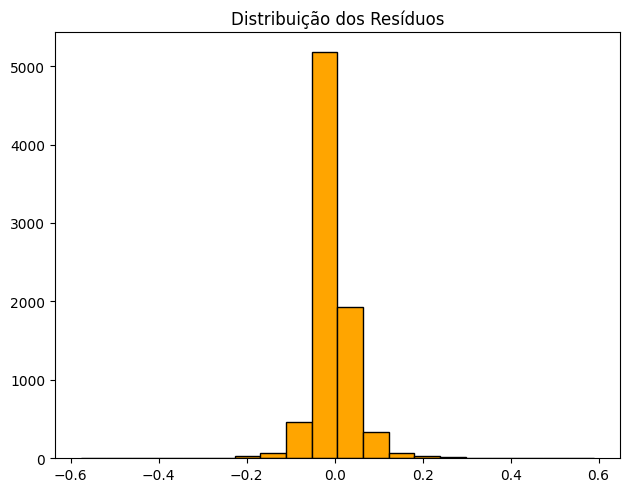

In [60]:
data_mm['residual'].hist(bins=20,
                         edgecolor='black',
                         color='orange')

plt.grid(False)
plt.tight_layout()
plt.title('Distribuição dos Resíduos')

## Conclusão

Tems agora um dataset com todos os indices dos jogadores que foram superfaturados em suas carreiras baseados no nosso modelo com maior nível de precisão.

In [61]:
data_mm.sort_values(by='residual',ascending= False,inplace=True)

In [62]:
super_faturados = data[(data_mm['residual'] > rand_forest_reg_rmse_mm)]['playerId']

<ipython-input-62-bd4c6d2207b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  super_faturados = data[(data_mm['residual'] > rand_forest_reg_rmse_mm)]['playerId']


In [63]:
super_faturados

2362       1031
4258       3402
6720    2579294
7171    4064730
2095       1006
         ...   
5232       4251
5680       6591
6608    2327577
7702    3907498
4144       1781
Name: playerId, Length: 271, dtype: object


---
Como os jogadores estão já ordenados por resíduo, basta pegar o maior deles


---





In [64]:
id = int(super_faturados.values[0])

In [65]:
final_df = pd.read_csv('/content/drive/MyDrive/MBA/Introdução à aprendizagem de máquina/trabalho/dataset/nba_stats.csv',
                   sep=",")

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8162 non-null   int64  
 1   name                              8162 non-null   object 
 2   playerId                          8162 non-null   int64  
 3   playerSlug                        8162 non-null   object 
 4   positionId                        8156 non-null   object 
 5   teamId                            8162 non-null   object 
 6   status                            8162 non-null   object 
 7   gamesPlayed                       8162 non-null   float64
 8   avgMinutes                        8162 non-null   float64
 9   avgFouls                          8162 non-null   float64
 10  flagrantFouls                     8162 non-null   float64
 11  technicalFouls                    8162 non-null   float64
 12  ejecti

In [66]:
mask = (final_df['playerId'] == id)

In [70]:
final_df[mask]['name'].unique()

array(['Maurice Evans'], dtype=object)